### CNN-Plant Seeding Classification Project

The case study is from a dataset from Kaggle. 

Link to the Kaggle project site:

https://www.kaggle.com/c/plant-seedlings-classification (Links to an external site.)Links to an external site.

The dataset has to be downloaded from the above Kaggle web site.


Can you differentiate a weed from a crop seedling?

The ability to do so effectively can mean better crop yields and better stewardship of the environment.

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing images of approximately 960 unique plants belonging to 12 species at several growth stages.

##### Importing numpy and pandas libraries:

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras


Using TensorFlow backend.


##### Importing ploting libraries

In [0]:
import matplotlib.pyplot as plt   
# importing seaborn for statistical plots
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

##### Importing Tensorflow and Keras libraries

In [0]:
import h5py
import tensorflow as tf
import keras

In [0]:
import warnings 
warnings.filterwarnings('ignore')

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
filePath="/content/drive/My Drive/Project/R7_CNN_PlantSeedingClassification/Data/plant-seedlings-classification.zip"

In [0]:
!unzip -q "/content/drive/My Drive/Project/R7_CNN_PlantSeedingClassification/Data/plant-seedlings-classification.zip" -d "/content/drive/My Drive/Project/R7_CNN_PlantSeedingClassification/Data"

In [0]:
#Unzip Train Data
!unzip -q "/content/drive/My Drive/Project/R7_CNN_PlantSeedingClassification/Data/train.zip" -d "/content/drive/My Drive/Project/R7_CNN_PlantSeedingClassification/Data"

In [0]:
!unzip -q "/content/drive/My Drive/Project/R7_CNN_PlantSeedingClassification/Data/test.zip" -d "/content/drive/My Drive/Project/R7_CNN_PlantSeedingClassification/Data"

### 1. Read the images and generate the train and test dataset (10 points)

##### Reading the images and dividing it into Train and Test datasets:

In [0]:
trainDataPath="/content/drive/My Drive/Project/R7_CNN_PlantSeedingClassification/Data/train"
testDataPath="/content/drive/My Drive/Project/R7_CNN_PlantSeedingClassification/Data/test"

In [0]:
import os
from glob import glob
import cv2

In [0]:
lblDictionary = {'Loose Silky-bent':0, 'Charlock':1, 'Sugar beet':2, 'Small-flowered Cranesbill':3,
             'Common Chickweed':4, 'Common wheat':5, 'Maize':6, 'Cleavers':7, 'Scentless Mayweed':8,
             'Fat Hen':9, 'Black-grass':10, 'Shepherds Purse':11}

In [0]:
def getLabelClassFromFolderName(path):
  lbl_Dict=dict()
  i=0
  for class_folder_name in os.listdir(path):
    lbl_Dict[class_folder_name]=i
    i=i+1
  
  return lbl_Dict
    
  

In [0]:
def getImageDataFromLabelFolder(path,label_Class_Dictionary=None,img_w=128,img_h=128,isTrain_Data=False):
  images = []
  classes=[]
  
  if(isTrain_Data):
    for class_folder_name in os.listdir(path):
        class_folder_path = os.path.join(path, class_folder_name)
        class_label = class_folder_name
    
        for image_path in glob(os.path.join(class_folder_path, "*.png")):
            temp_img=tf.keras.preprocessing.image.load_img(image_path,target_size=(img_w,img_h))
            temp_img = tf.keras.preprocessing.image.img_to_array(temp_img)
            images.append(temp_img)
            classes.append(label_Class_Dictionary[class_label])
        
    classes = np.array(classes)
  else:
    
     for image_path in glob(os.path.join(path, "*.png")):
        test_img=tf.keras.preprocessing.image.load_img(image_path,target_size=(img_w,img_h))
        test_img = tf.keras.preprocessing.image.img_to_array(test_img)
        images.append(test_img)
        
      
  images = np.array(images)
  
  if(isTrain_Data):
    return images, classes
  else:
    return images
  

##### Creating Labels name  as dictionary format which help for modeling.
##### Here Label name will be get it from train data for each sub-folder name

In [0]:
lbl_Class=getLabelClassFromFolderName(trainDataPath)
print("Label Classes : \n {0}".format(lbl_Class))

Label Classes : 
 {'Common Chickweed': 0, 'Maize': 1, 'Charlock': 2, 'Common wheat': 3, 'Scentless Mayweed': 4, 'Loose Silky-bent': 5, 'Fat Hen': 6, 'Small-flowered Cranesbill': 7, 'Cleavers': 8, 'Black-grass': 9, 'Sugar beet': 10, 'Shepherds Purse': 11}


In [0]:
X,y=getImageDataFromLabelFolder(trainDataPath,lbl_Class,isTrain_Data=True)

In [0]:
X.shape

(4750, 128, 128, 3)

In [0]:
y.shape

(4750,)

In [0]:
X_test=getImageDataFromLabelFolder(testDataPath)

In [0]:
X_test.shape

(794, 128, 128, 3)

### Divide the data set into Train and validation data sets

1. training set : 70%
2. validation set: 30%

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=50)

In [0]:
print("Training Set",X_train.shape )
print("Validation Set",X_val.shape )
print("Test Set",X_test.shape )

Training Set (3325, 128, 128, 3)
Validation Set (1425, 128, 128, 3)
Test Set (794, 128, 128, 3)


### Convert train and validation data labels to one hot vectors

In [0]:
num_classes = 12 # No. of unique Label in the dataset (From 1 to 10)
# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

In [0]:
print(y_train.shape)
print('First 5 examples now are: \n', y_train[0:5])

(3325, 12)
First 5 examples now are: 
 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


### Normalize the Train, Test and Validation image data from 0-255 to 0-1

In [0]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_val = X_val.astype('float32') / 255

### Initialize & build the model (20 points)

##### Initializing model, reshaping & normalizing data:

In [0]:
model1 = tf.keras.models.Sequential()

In [0]:
model1.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3,  activation='relu', input_shape=(128,128,3)))
#model1.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,  activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model1.add(tf.keras.layers.Dropout(0.2))

In [0]:
#Add Flatten Layer
model1.add(tf.keras.layers.Flatten())

In [0]:
#Add - Dense Layer - 128 Nurons with Relu
model1.add(tf.keras.layers.Dense(64, activation='relu'))
#Add - Dense Layer - 128 Nurons with Relu
model1.add(tf.keras.layers.Dense(64, activation='relu'))
#Add - Dense Layer/output layer - 12 Nurons with Softmax
model1.add(tf.keras.layers.Dense(12, activation='softmax'))

In [0]:
# compile model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
# Fit the model1 with 30 epochs and batch size 128 for train and validation data
m1_history=model1.fit(X_train, y_train, 
          validation_data=(X_val, y_val), 
          epochs=30,
          batch_size=128)

Train on 3325 samples, validate on 1425 samples
Epoch 1/30
3325/3325 [==============================] - 72s 22ms/sample - loss: 2.9491 - acc: 0.1299 - val_loss: 2.3542 - val_acc: 0.1916
Epoch 2/30
3325/3325 [==============================] - 69s 21ms/sample - loss: 2.1859 - acc: 0.2785 - val_loss: 2.0483 - val_acc: 0.3354
Epoch 3/30
3325/3325 [==============================] - 71s 21ms/sample - loss: 1.8727 - acc: 0.3765 - val_loss: 1.7947 - val_acc: 0.3796
Epoch 4/30
3325/3325 [==============================] - 71s 21ms/sample - loss: 1.6308 - acc: 0.4493 - val_loss: 1.6596 - val_acc: 0.4091
Epoch 5/30
3325/3325 [==============================] - 71s 21ms/sample - loss: 1.4353 - acc: 0.5002 - val_loss: 1.4804 - val_acc: 0.4821
Epoch 6/30
3325/3325 [==============================] - 72s 22ms/sample - loss: 1.2275 - acc: 0.5919 - val_loss: 1.3468 - val_acc: 0.5698
Epoch 7/30
3325/3325 [==============================] - 72s 22ms/sample - loss: 1.0812 - acc: 0.6421 - val_loss: 1.3048 - va

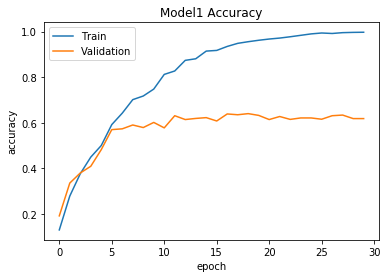

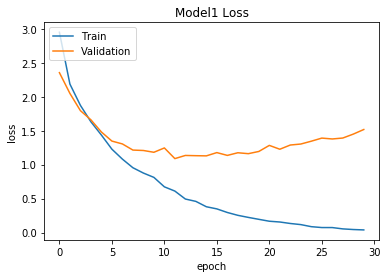

In [0]:
# summarize history for accuracy
plt.plot(m1_history.history['acc'])
plt.plot(m1_history.history['val_acc'])
plt.title('Model1 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(m1_history.history['loss'])
plt.plot(m1_history.history['val_loss'])
plt.title('Model1 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Summary Model 1:

Model 1 is highly over-fit. This not a good model.Lets try to optimize and will improve model performance

In [0]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 254016)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                16257088  
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 12)               

### Optimize the model (16 points)

#### 1. Data Augmentation - Optimization technique

##### Constructing the training image generator for data augmentation

In [0]:
datagen = keras.preprocessing.image.ImageDataGenerator(rotation_range=20, zoom_range=0.15,
	width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
	horizontal_flip=True)

In [0]:
datagen.fit(X_train)
datagen.fit(X_val)

In [0]:
#Create train and test generator
batchsize = 64
train_generator = datagen.flow(X_train, y_train, batch_size=batchsize) #batchsize can be changed
test_generator = datagen.flow(X_val, y_val, batch_size=batchsize)

In [0]:
#Initialize model, reshape & normalize data
model2 = tf.keras.models.Sequential()

In [0]:
model2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3,  activation='relu', input_shape=(128,128,3)))
#model1.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,  activation='relu'))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model2.add(tf.keras.layers.Dropout(0.2))

In [0]:
#Add Flatten Layer
model2.add(tf.keras.layers.Flatten())
#Add - Dense Layer - 128 Nurons with Relu
model2.add(tf.keras.layers.Dense(64, activation='relu'))
#Add - Dense Layer - 128 Nurons with Relu
model2.add(tf.keras.layers.Dense(64, activation='relu'))
#Add - Dense Layer/output layer - 12 Nurons with Softmax
model2.add(tf.keras.layers.Dense(12, activation='softmax'))

In [0]:
# compile model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
# Fit the model1 with 30 epochs and batch size 128 for train and validation data
m2_history=model2.fit_generator(train_generator, 
          validation_data=test_generator, 
          epochs=30)

Epoch 1/30
52/52 [==============================] - 82s 2s/step - loss: 2.7879 - acc: 0.1642 - val_loss: 2.3669 - val_acc: 0.2512
Epoch 2/30
52/52 [==============================] - 78s 2s/step - loss: 2.2541 - acc: 0.2550 - val_loss: 2.1061 - val_acc: 0.2618
Epoch 3/30
52/52 [==============================] - 79s 2s/step - loss: 1.9900 - acc: 0.3218 - val_loss: 1.8830 - val_acc: 0.3614
Epoch 4/30
52/52 [==============================] - 79s 2s/step - loss: 1.8396 - acc: 0.3609 - val_loss: 1.7679 - val_acc: 0.3804
Epoch 5/30
52/52 [==============================] - 79s 2s/step - loss: 1.7555 - acc: 0.3808 - val_loss: 1.7423 - val_acc: 0.3656
Epoch 6/30
52/52 [==============================] - 79s 2s/step - loss: 1.7059 - acc: 0.3913 - val_loss: 1.6885 - val_acc: 0.4049
Epoch 7/30
52/52 [==============================] - 79s 2s/step - loss: 1.6441 - acc: 0.4144 - val_loss: 1.5863 - val_acc: 0.4253
Epoch 8/30
52/52 [==============================] - 79s 2s/step - loss: 1.5864 - acc: 0.44

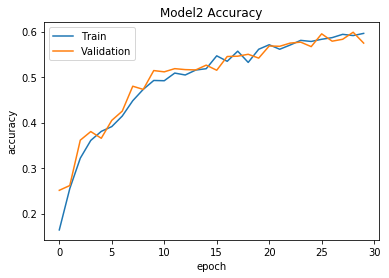

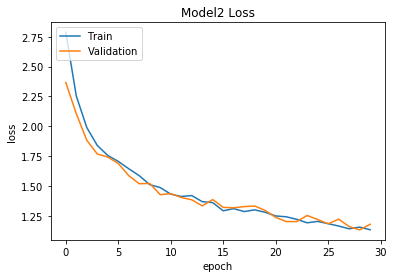

In [0]:
# summarize history for accuracy
plt.plot(m2_history.history['acc'])
plt.plot(m2_history.history['val_acc'])
plt.title('Model2 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(m2_history.history['loss'])
plt.plot(m2_history.history['val_loss'])
plt.title('Model2 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

##### Predicting the accuracy for both train and validation data (14 points)

In [0]:
model_Train_result=model2.evaluate(X_train,y_train,verbose=1)


3325/3325 [==============================] - 15s 5ms/sample - loss: 0.9904 - acc: 0.6454


In [0]:
model_val_result=model2.evaluate(X_val,y_val,verbose=1)

1425/1425 [==============================] - 7s 5ms/sample - loss: 0.9812 - acc: 0.6498


In [0]:
model_Result=pd.DataFrame(index=["Data Type","Accuracy","Loss"])
model_Result["TrainData"]=["Train Data",("%0.2f" % ((model_Train_result[1]*100))),("%0.2f" % ((model_Train_result[0])))]
model_Result["ValData"]=["Validation Data",("%0.2f" % ((model_val_result[1]*100))),("%0.2f" % ((model_val_result[0])))]


In [0]:
model_Result

,TrainData,ValData
Data Type,Train Data,Validation Data
Accuracy,64.54,64.98
Loss,0.99,0.98
